In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = 999
sns.set_style('whitegrid')

import dython
from dython.nominal import correlation_ratio
# https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/representationdetails/55d624fdad35c7e854cb21a4/

In [3]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('PHL_Building_Dataset_Clean.csv')
df.head()

,Unnamed: 0,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section
0,0,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,29.17,A,4.0,220 WHARTON ST,257500.0,2.0,3.0,6.0,2.0,E,ST,F,2625.3,1266.0,H,I,1960.0,RSA5,MASONRY,South
1,1,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.03,A,4.0,222 WHARTON ST,249400.0,2.0,3.0,6.0,2.0,E,ST,F,1622.7,1266.0,A,I,1960.0,RSA5,MASONRY,South
2,2,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.05,A,4.0,224 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1624.5,1266.0,A,I,1960.0,RSA5,MASONRY,South
3,3,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.08,A,4.0,226 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1627.2,1266.0,H,I,1960.0,RSA5,MASONRY,South
4,4,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.71,A,4.0,228 WHARTON ST,253800.0,2.0,3.0,6.0,2.0,E,ST,F,1683.9,1310.0,H,I,1960.0,RSA5,MASONRY,South


In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section
0,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,29.17,A,4.0,220 WHARTON ST,257500.0,2.0,3.0,6.0,2.0,E,ST,F,2625.3,1266.0,H,I,1960.0,RSA5,MASONRY,South
1,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.03,A,4.0,222 WHARTON ST,249400.0,2.0,3.0,6.0,2.0,E,ST,F,1622.7,1266.0,A,I,1960.0,RSA5,MASONRY,South
2,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.05,A,4.0,224 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1624.5,1266.0,A,I,1960.0,RSA5,MASONRY,South
3,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.08,A,4.0,226 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1627.2,1266.0,H,I,1960.0,RSA5,MASONRY,South
4,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.71,A,4.0,228 WHARTON ST,253800.0,2.0,3.0,6.0,2.0,E,ST,F,1683.9,1310.0,H,I,1960.0,RSA5,MASONRY,South


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44484 entries, 0 to 44483
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   basements                  44484 non-null  object 
 1   building_code_description  44484 non-null  object 
 2   central_air                44484 non-null  object 
 3   depth                      44484 non-null  float64
 4   exterior_condition         44484 non-null  float64
 5   fireplaces                 44484 non-null  float64
 6   frontage                   44484 non-null  float64
 7   garage_type                44484 non-null  object 
 8   interior_condition         44484 non-null  float64
 9   location                   44484 non-null  object 
 10  market_value               44484 non-null  float64
 11  number_of_bathrooms        44484 non-null  float64
 12  number_of_bedrooms         44484 non-null  float64
 13  number_of_rooms            44484 non-null  flo

In [8]:
desc1 = []

for i in df.columns:
    desc1.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (df[i].isna().sum()/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])
    
pd.DataFrame(data = desc1,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,basements,object,0,0.0,11,[J]
1,building_code_description,object,0,0.0,212,[S/D W/D GAR 2 STY STONE]
2,central_air,object,0,0.0,2,[N]
3,depth,float64,0,0.0,6378,[128.44]
4,exterior_condition,float64,0,0.0,6,[7.0]
5,fireplaces,float64,0,0.0,6,[5.0]
6,frontage,float64,0,0.0,4146,[24.34]
7,garage_type,object,0,0.0,5,[B]
8,interior_condition,float64,0,0.0,6,[6.0]
9,location,object,0,0.0,44328,[1120 ANCHOR ST]


## Re-Categorize Data

In [9]:
# re-categorize topography
df['topography'] = df['topography'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6})

In [10]:
df['topography'].value_counts()

6    39500
1     4502
5      350
2      100
4       18
3       14
Name: topography, dtype: int64

In [11]:
# re-categorize zoning
df['zoning'] = df['zoning'].replace({'RSA5 ': 1, 'RSA4 ': 2, 'RSA3 ': 3, 'RSA2 ': 4, 'RSA1 ': 5, 'RSD3 ': 6, 'RSD2 ': 7, 'RSD1 ': 8})

In [12]:
df['zoning'].value_counts()
# Checking this all done for re-categorize

1    28962
3     8317
2     2307
6     2197
4     1859
8      601
5      231
7       10
Name: zoning, dtype: int64

# Unsupervised Machine Learning for Exploratory Data Analysis

### Clustering by market_value, total_area, total_liveable_area, zoning

In [13]:
cust = df[['market_value', 'total_area' ,'total_livable_area', 'zoning']].values

In [14]:
X = cust

# KMeans Model

From the Data Processing Notebook, we choose KMeans Model for Clustering Residence per Segment with 5 clusters.

In [15]:
Model_KM = KMeans(n_clusters = 5, random_state=42)

In [16]:
Model_KM.fit(X)

KMeans(n_clusters=5, random_state=42)

In [17]:
cluster = Model_KM.predict(X)

In [18]:
df['segment'] = cluster

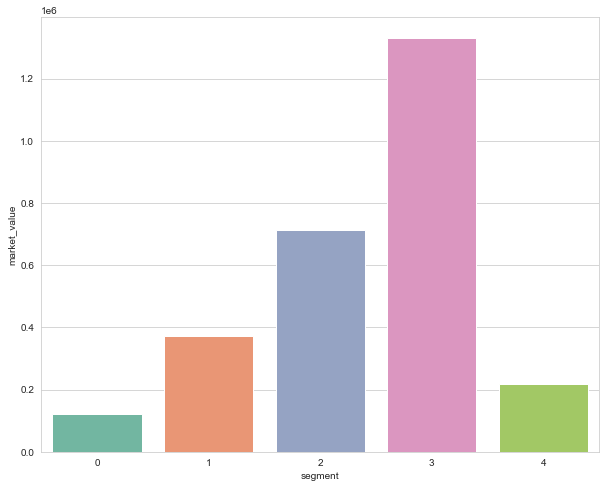

In [19]:
price = df[['segment','market_value']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(price['segment'], price['market_value'], palette ='Set2')
plt.show()

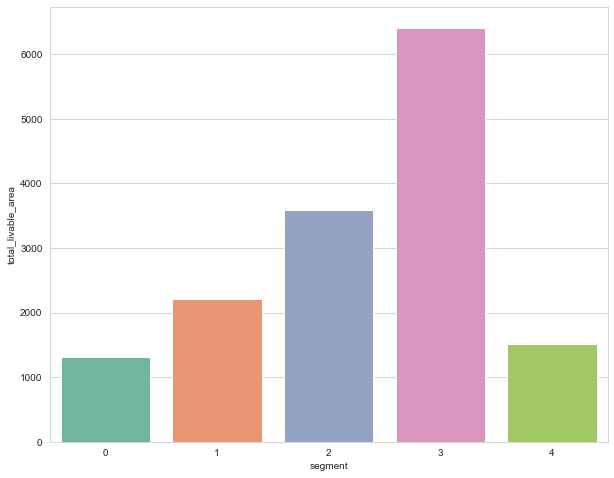

In [20]:
live = df[['total_livable_area', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(live['segment'], live['total_livable_area'], palette ='Set2')
plt.show()

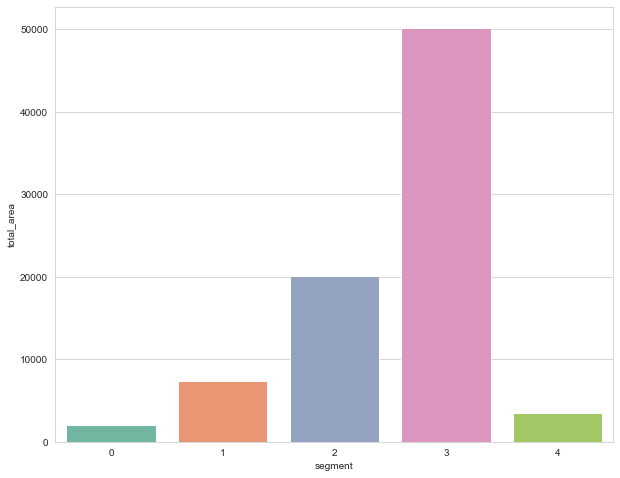

In [21]:
area = df[['total_area', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(area['segment'], area['total_area'], palette = 'Set2')
plt.show()

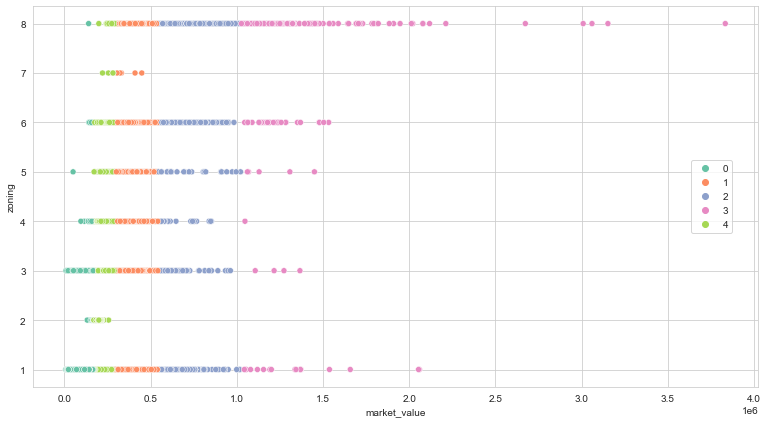

In [22]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'zoning', data=df, hue = 'segment', palette = 'Set2', legend='full').legend(loc='center left', bbox_to_anchor=(0.9, 0.5), ncol=1)
plt.show()

In [23]:
pd.crosstab(index=df['segment'], columns=df['zoning'])
# 0 -> low
# 1 -> middle
# 2 -> upper middle
# 3 -> top
# 4 -> lower middle

zoning,1,2,3,4,5,6,7,8
segment,,,,,,,,
0,21613,17,2208,81,1,17,0,1
1,1540,0,773,374,115,1197,5,128
2,117,0,80,22,27,220,0,294
3,17,0,4,1,5,28,0,156
4,5675,2290,5252,1381,83,735,5,22


In [24]:
df['segment'] = df['segment'].replace({0 : 1, 1 : 3, 2 : 4, 3 : 5, 4 : 2})

Segmentation from customers is more based on the market value of the property owned by the customer. To facilitate grouping, each group will be given a name.
- segment 0 -> low
- segment 1 -> middle
- segment 2 -> upper middle
- segment 3 -> top
- segment 4 -> lower middle

Then we need to change the number of the segmentation to be sequential to facilitate data analysis
- from segment 0 -> segment 1 -> low
- from segment 4 -> segment 2 -> lower middle
- from segment 1 -> segment 3 -> middle
- from segment 2 -> segment 4 -> upper middle
- from segment 3 -> segment 5 -> top

# Exploratory Data Analysis - Classification

# Multivariate

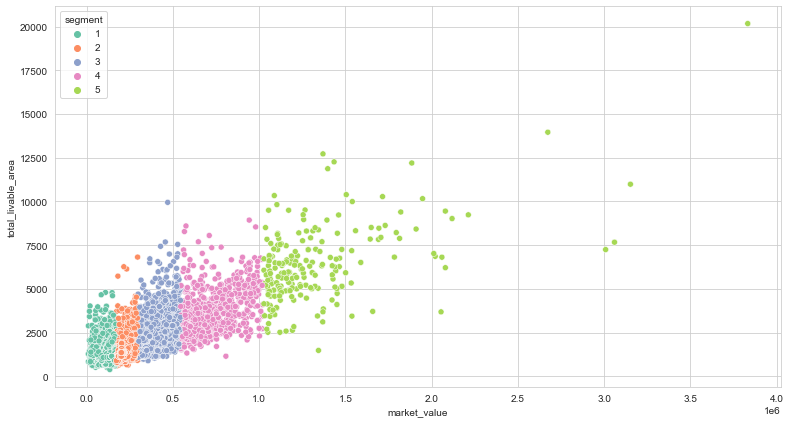

In [25]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'total_livable_area', data=df, hue = 'segment', palette = 'Set2' )
plt.show()

There is a segmented distribution based on market_value and total_livable_area.

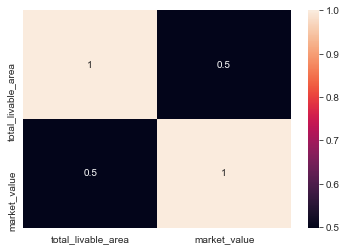

In [26]:
sns.heatmap(df[['total_livable_area', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the scatterplot and heatmap there is linear relationship between total livable area and market value, the correlation is 0.5 (moderate - strong positive correlation). This means that total livable area is affecting the price of the property. It is common because more livable area will required more resources to built.

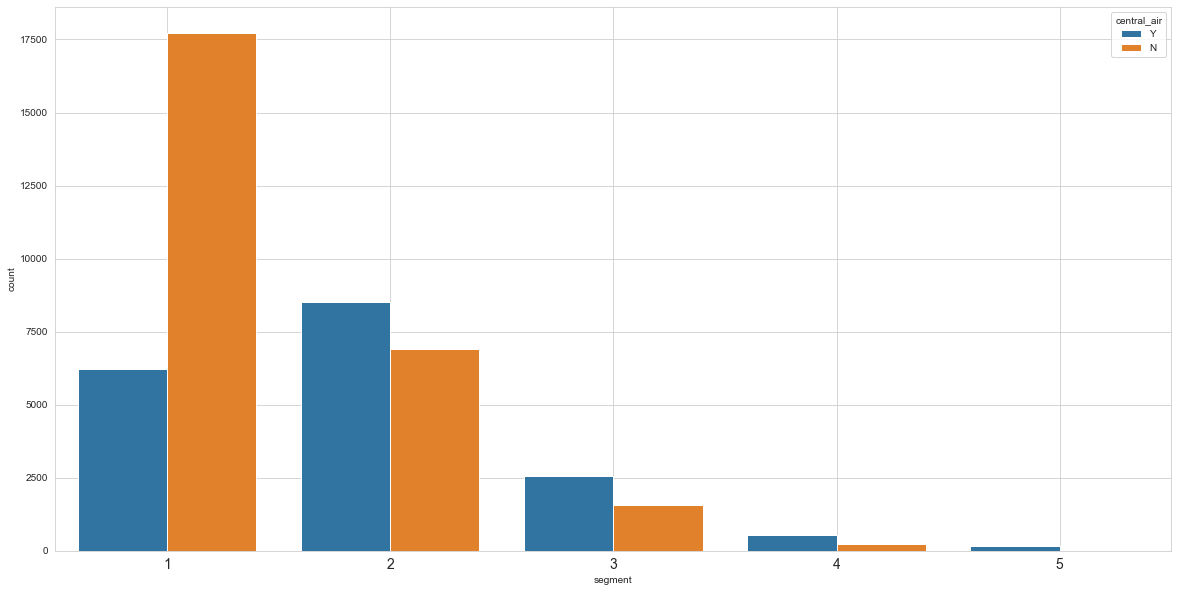

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['segment'], hue=df['central_air'])
plt.grid(True)
plt.xticks(rotation=0, size=14)
plt.show()

As we can see from the graph, group from the first segment answered mostly no for central air, but at the same time, higher segment mostly answered yes even though some of them also answered no.

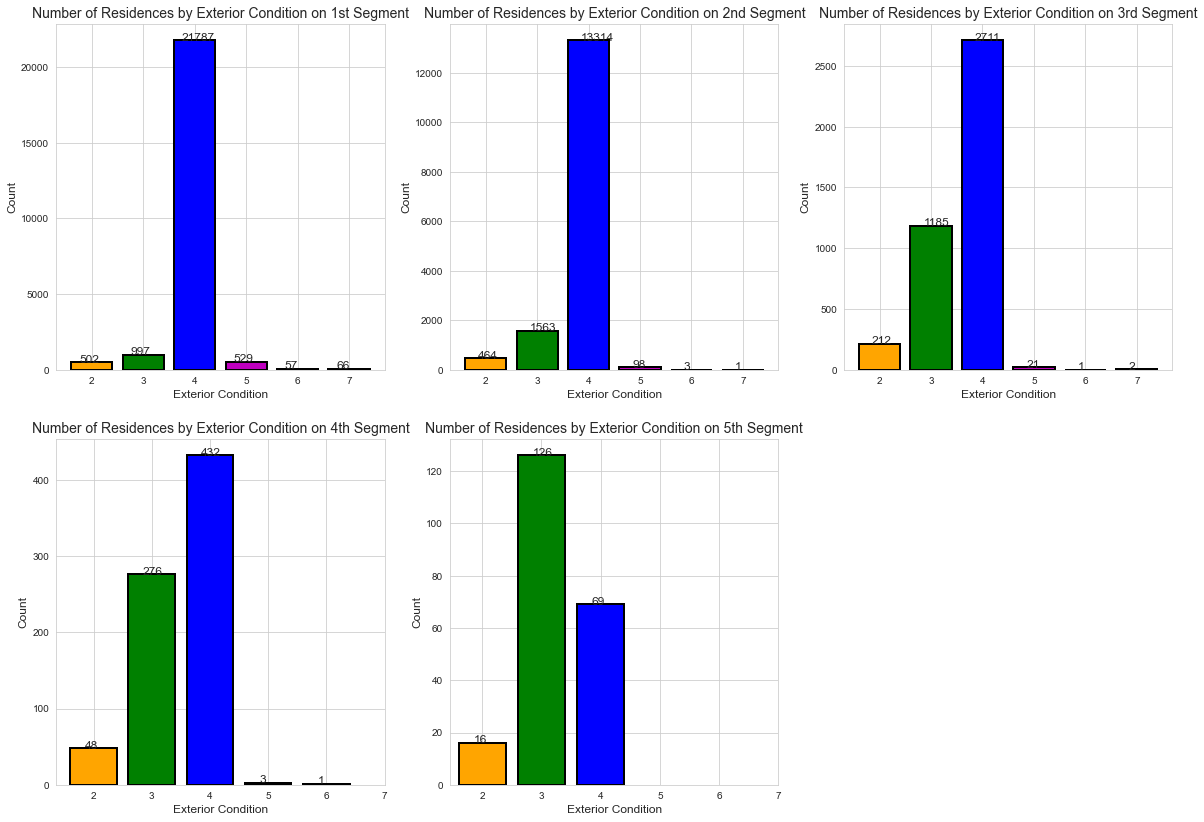

In [28]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['exterior_condition', 'segment']].groupby('exterior_condition').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['exterior_condition'], seg1['count'], color = ['orange','g','b','m','c','brown'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg1['count']):
    ax1.text(index+1.75, value, str(value), size=12)
ax1.set_xlabel('Exterior Condition', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Exterior Condition on 1st Segment', size=14)
ax1.set_xticks([2,3,4,5,6,7])

ax2.bar(seg2['exterior_condition'], seg2['count'], color = ['orange','g','b','m','c','brown'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg2['count']):
    ax2.text(index+1.85, value, str(value), size=12)
ax2.set_xlabel('Exterior Condition', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Exterior Condition on 2nd Segment', size=14)
ax2.set_xticks([2,3,4,5,6,7])

ax3.bar(seg3['exterior_condition'], seg3['count'], color = ['orange','g','b','m','c','brown'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg3['count']):
    ax3.text(index+1.85, value, str(value), size=12)
ax3.set_xlabel('Exterior Condition', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Exterior Condition on 3rd Segment', size=14)
ax3.set_xticks([2,3,4,5,6,7])

ax4.bar(seg4['exterior_condition'], seg4['count'], color = ['orange','g','b','m','c'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg4['count']):
    ax4.text(index+1.85, value, str(value), size=12)
ax4.set_xlabel('Exterior Condition', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Exterior Condition on 4th Segment', size=14)
ax4.set_xticks([2,3,4,5,6,7])

ax5.bar(seg5['exterior_condition'], seg5['count'], color = ['orange','g','b'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg5['count']):
    ax5.text(index+1.85, value, str(value), size=12)
ax5.set_xlabel('Exterior Condition', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Exterior Condition on 5th Segment', size=14)
ax5.set_xticks([2,3,4,5,6,7])

plt.show()

'Average' condition for exterior dominate the first to fourth segment, but at the same time 'above average' also seeing an increase in the higher segment with the fifth segment having 'above average' dominate fully.

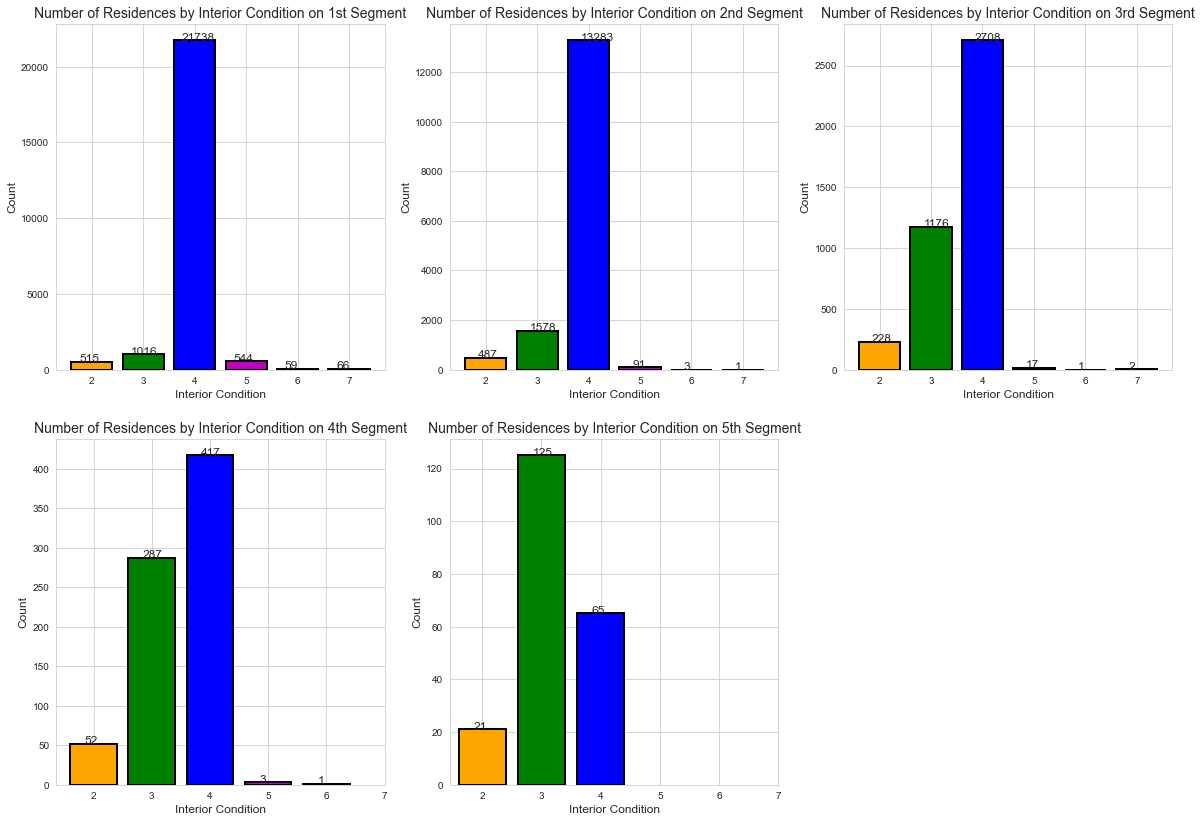

In [29]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['interior_condition', 'segment']].groupby('interior_condition').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['interior_condition'], seg1['count'], color = ['orange','g','b','m','c','brown'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg1['count']):
    ax1.text(index+1.75, value, str(value), size=12)
ax1.set_xlabel('Interior Condition', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Interior Condition on 1st Segment', size=14)
ax1.set_xticks([2,3,4,5,6,7])

ax2.bar(seg2['interior_condition'], seg2['count'], color = ['orange','g','b','m','c','brown'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg2['count']):
    ax2.text(index+1.85, value, str(value), size=12)
ax2.set_xlabel('Interior Condition', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Interior Condition on 2nd Segment', size=14)
ax2.set_xticks([2,3,4,5,6,7])

ax3.bar(seg3['interior_condition'], seg3['count'], color = ['orange','g','b','m','c','brown'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg3['count']):
    ax3.text(index+1.85, value, str(value), size=12)
ax3.set_xlabel('Interior Condition', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Interior Condition on 3rd Segment', size=14)
ax3.set_xticks([2,3,4,5,6,7])

ax4.bar(seg4['interior_condition'], seg4['count'], color = ['orange','g','b','m','c'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg4['count']):
    ax4.text(index+1.85, value, str(value), size=12)
ax4.set_xlabel('Interior Condition', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Interior Condition on 4th Segment', size=14)
ax4.set_xticks([2,3,4,5,6,7])

ax5.bar(seg5['interior_condition'], seg5['count'], color = ['orange','g','b'], edgecolor='k', linewidth=2)
for index, value in enumerate(seg5['count']):
    ax5.text(index+1.85, value, str(value), size=12)
ax5.set_xlabel('Interior Condition', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Interior Condition on 5th Segment', size=14)
ax5.set_xticks([2,3,4,5,6,7])

plt.show()

'Average' condition for interior dominate the first to fourth segment, but at the same time 'above average' also seeing an increase in the higher segment with the fifth segment having 'above average' dominate fully.

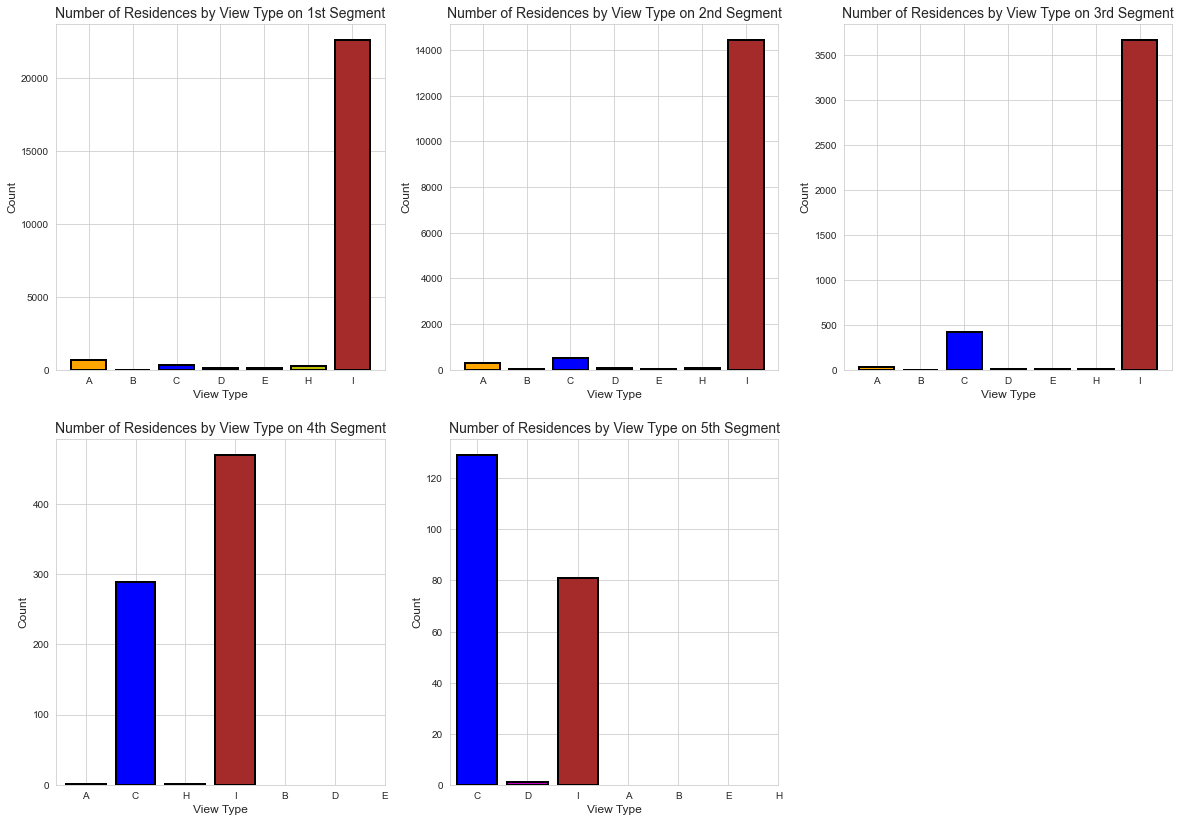

In [30]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['view_type', 'segment']].groupby('view_type').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['view_type'], seg1['count'], color = ['orange','g','b','m','c','y','brown'], edgecolor='k', linewidth=2)
ax1.set_xlabel('View Type', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by View Type on 1st Segment', size=14)
ax1.set_xticks(['A','B','C','D','E','H','I'])

ax2.bar(seg2['view_type'], seg2['count'], color = ['orange','g','b','m','c','y','brown'], edgecolor='k', linewidth=2)
ax2.set_xlabel('View Type', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by View Type on 2nd Segment', size=14)
ax2.set_xticks(['A','B','C','D','E','H','I'])

ax3.bar(seg3['view_type'], seg3['count'], color = ['orange','g','b','m','c','y','brown'], edgecolor='k', linewidth=2)
ax3.set_xlabel('View Type', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by View Type on 3rd Segment', size=14)
ax3.set_xticks(['A','B','C','D','E','H','I'])

ax4.bar(seg4['view_type'], seg4['count'], color = ['orange','b','y','brown'], edgecolor='k', linewidth=2)
ax4.set_xlabel('View Type', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by View Type on 4th Segment', size=14)
ax4.set_xticks(['A','B','C','D','E','H','I'])

ax5.bar(seg5['view_type'], seg5['count'], color = ['b','m','brown'], edgecolor='k', linewidth=2)
ax5.set_xlabel('View Type', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by View Type on 5th Segment', size=14)
ax5.set_xticks(['A','B','C','D','E','H','I'])

plt.show()

'Typical' dominate the view type for the first to fourth segment, but at the same time 'park/green area' also seeing an increase in the higher segment with the fifth segment having 'park/green area' dominate fully.

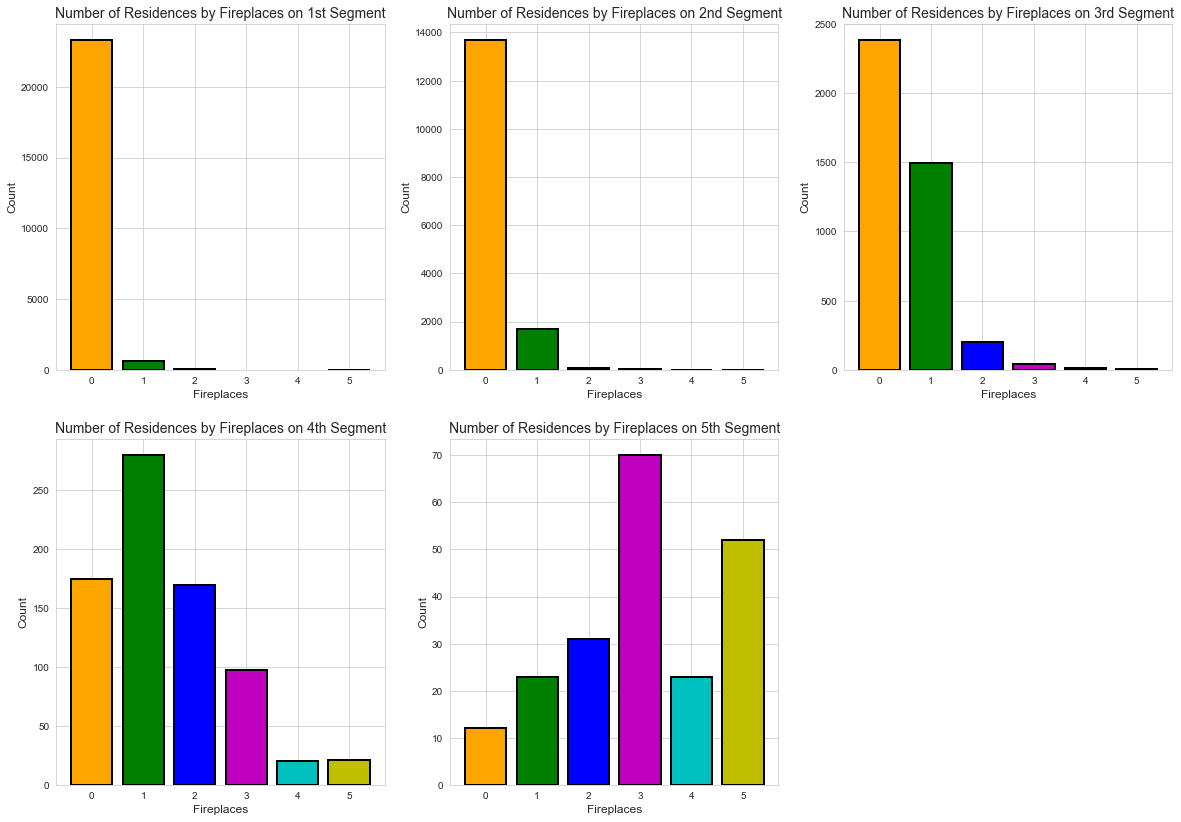

In [31]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['fireplaces', 'segment']].groupby('fireplaces').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['fireplaces'], seg1['count'], color = ['orange','g','c','y'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Fireplaces', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Fireplaces on 1st Segment', size=14)
ax1.set_xticks([0,1,2,3,4,5])

ax2.bar(seg2['fireplaces'], seg2['count'], color = ['orange','g','b','m','c','y'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Fireplaces', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Fireplaces on 2nd Segment', size=14)
ax2.set_xticks([0,1,2,3,4,5])

ax3.bar(seg3['fireplaces'], seg3['count'], color = ['orange','g','b','m','c','y'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Fireplaces', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Fireplaces on 3rd Segment', size=14)
ax3.set_xticks([0,1,2,3,4,5])

ax4.bar(seg4['fireplaces'], seg4['count'], color = ['orange','g','b','m','c','y'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Fireplaces', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Fireplaces on 4th Segment', size=14)
ax4.set_xticks([0,1,2,3,4,5])

ax5.bar(seg5['fireplaces'], seg5['count'], color = ['orange','g','b','m','c','y'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Fireplaces', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Fireplaces on 5th Segment', size=14)
ax5.set_xticks([0,1,2,3,4,5])

plt.show()

In the higher the segment, we can see an increase of houses with fireplaces.

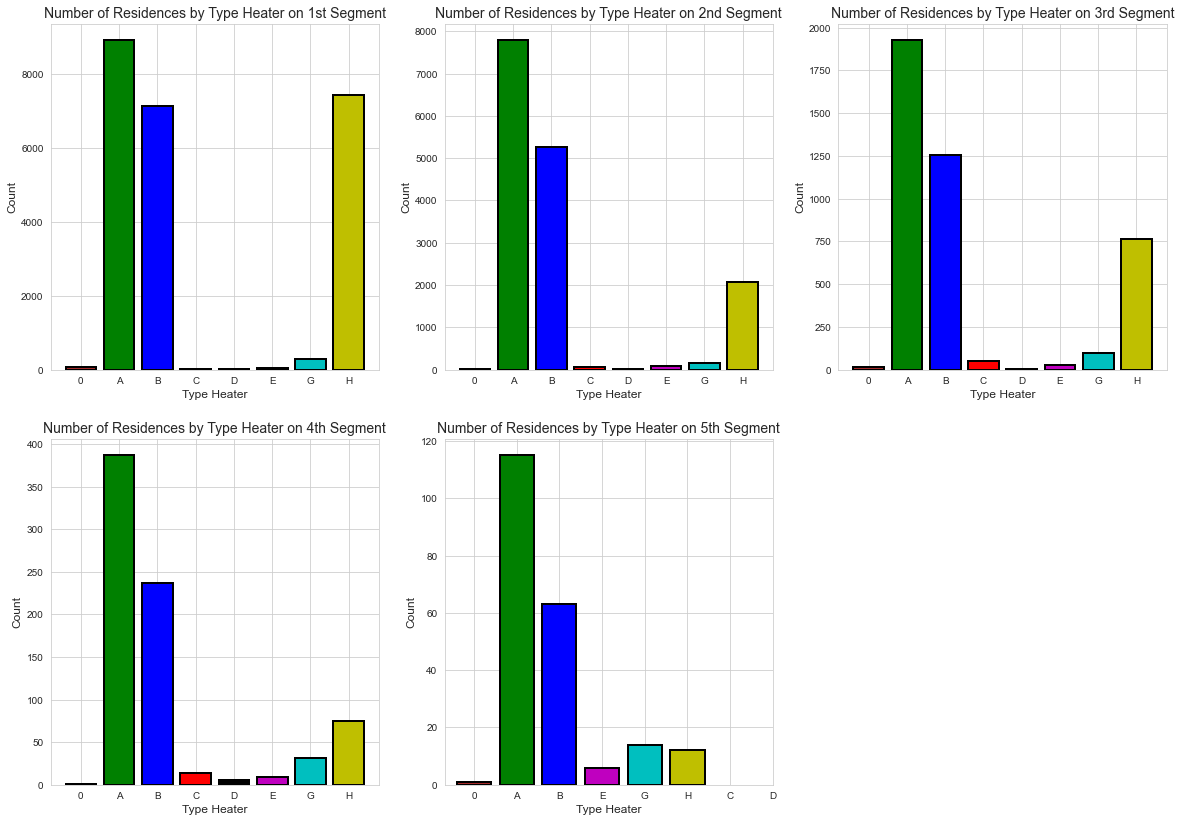

In [32]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['type_heater', 'segment']].groupby('type_heater').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['type_heater'], seg1['count'], color = ['brown','g','b','r','k','m','c','y'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Type Heater', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Type Heater on 1st Segment', size=14)
ax1.set_xticks(['0','A','B','C','D','E','G','H'])

ax2.bar(seg2['type_heater'], seg2['count'], color = ['brown','g','b','r','k','m','c','y'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Type Heater', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Type Heater on 2nd Segment', size=14)
ax2.set_xticks(['0','A','B','C','D','E','G','H'])

ax3.bar(seg3['type_heater'], seg3['count'], color = ['brown','g','b','r','k','m','c','y'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Type Heater', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Type Heater on 3rd Segment', size=14)
ax3.set_xticks(['0','A','B','C','D','E','G','H'])

ax4.bar(seg4['type_heater'], seg4['count'], color = ['brown','g','b','r','k','m','c','y'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Type Heater', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Type Heater on 4th Segment', size=14)
ax4.set_xticks(['0','A','B','C','D','E','G','H'])

ax5.bar(seg5['type_heater'], seg5['count'], color = ['brown','g','b','m','c','y'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Type Heater', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Type Heater on 5th Segment', size=14)
ax5.set_xticks(['0','A','B','C','D','E','G','H'])

plt.show()

'Hot air ducts', 'hot water' and 'undetermined' dominate the heater type with exception in the fifth segment where 'heat pump' and 'radiant' started to take over.

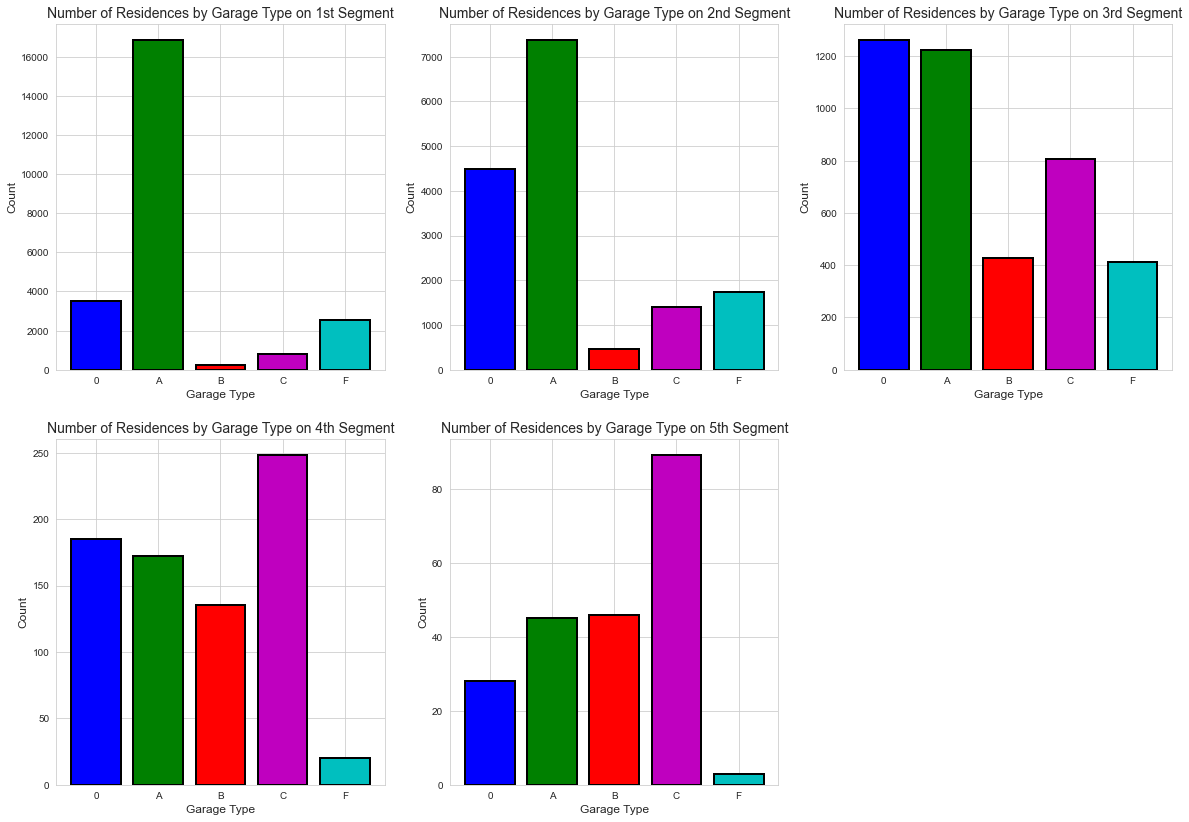

In [33]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['garage_type', 'segment']].groupby('garage_type').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['garage_type'], seg1['count'], color = ['b','g','r','m','c'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Garage Type', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Garage Type on 1st Segment', size=14)
ax1.set_xticks(['0','A','B','C','F'])

ax2.bar(seg2['garage_type'], seg2['count'], color = ['b','g','r','m','c'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Garage Type', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Garage Type on 2nd Segment', size=14)
ax2.set_xticks(['0','A','B','C','F'])

ax3.bar(seg3['garage_type'], seg3['count'], color = ['b','g','r','m','c'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Garage Type', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Garage Type on 3rd Segment', size=14)
ax3.set_xticks(['0','A','B','C','F'])

ax4.bar(seg4['garage_type'], seg4['count'], color = ['b','g','r','m','c'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Garage Type', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Garage Type on 4th Segment', size=14)
ax4.set_xticks(['0','A','B','C','F'])

ax5.bar(seg5['garage_type'], seg5['count'], color = ['b','g','r','m','c'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Garage Type', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Garage Type on 5th Segment', size=14)
ax5.set_xticks(['0','A','B','C','F'])

plt.show()

'Built in/basement' dominates the garage type in the first to third segment, whereas the fourth and fifth segment prefer 'detached' garage.


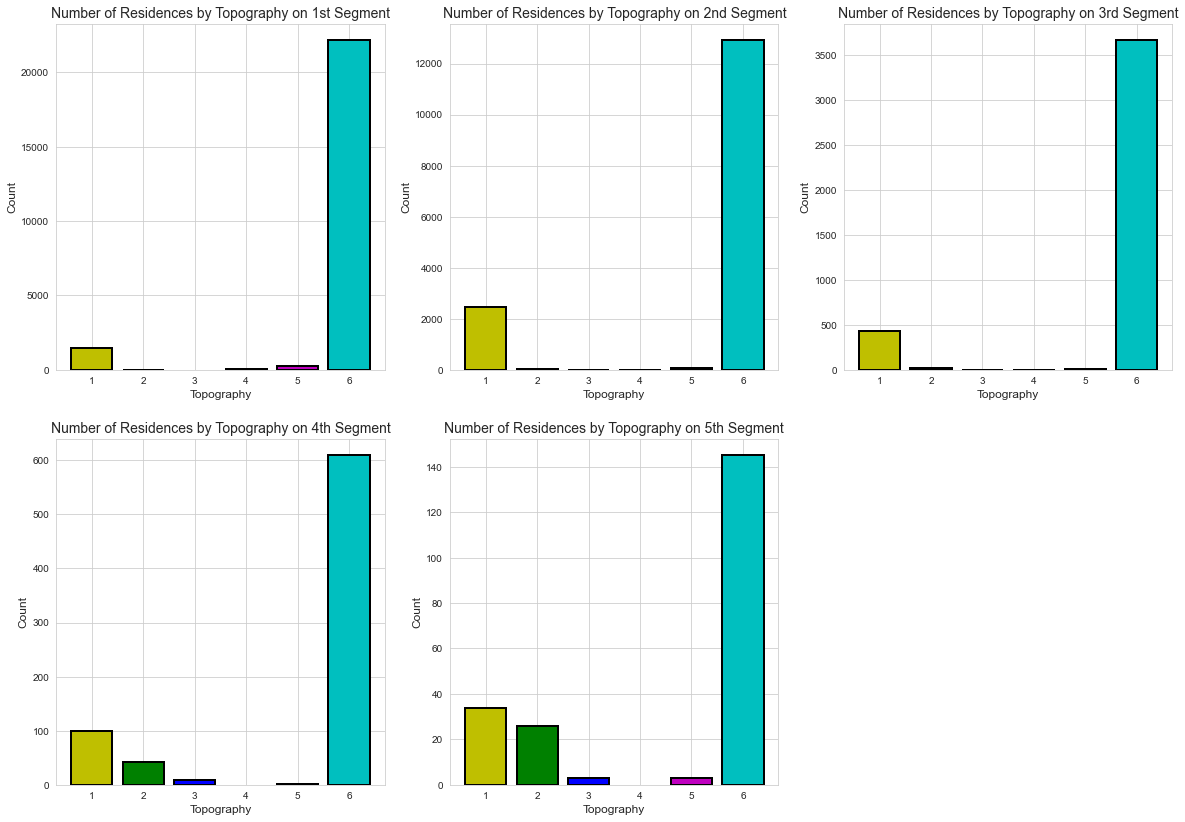

In [34]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['topography', 'segment']].groupby('topography').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['topography'], seg1['count'], color = ['y','g','r','m','c'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Topography', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Topography on 1st Segment', size=14)
ax1.set_xticks([1,2,3,4,5,6])

ax2.bar(seg2['topography'], seg2['count'], color = ['y','g','b','r','m','c'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Topography', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Topography on 2nd Segment', size=14)
ax2.set_xticks([1,2,3,4,5,6])

ax3.bar(seg3['topography'], seg3['count'], color = ['y','g','b','r','m','c'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Topography', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Topography on 3rd Segment', size=14)
ax3.set_xticks([1,2,3,4,5,6])

ax4.bar(seg4['topography'], seg4['count'], color = ['y','g','b','m','c'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Topography', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Topography on 4th Segment', size=14)
ax4.set_xticks([1,2,3,4,5,6])

ax5.bar(seg5['topography'], seg5['count'], color = ['y','g','b','m','c'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Topography', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Topography on 5th Segment', size=14)
ax5.set_xticks([1,2,3,4,5,6])

plt.show()

'Level' dominate the topography type in the first to third segment, whereas we can see more houses 'below street level' at fourth and fifth segment.

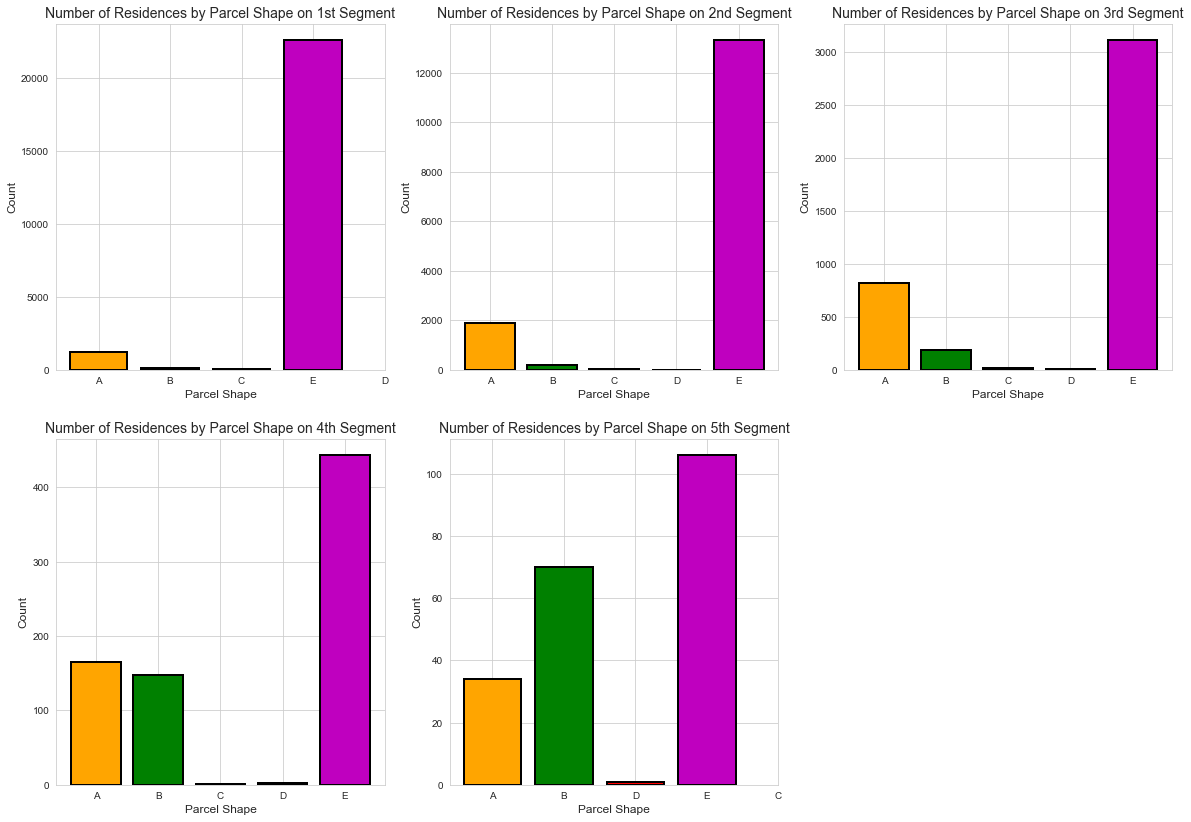

In [35]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['parcel_shape', 'segment']].groupby('parcel_shape').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['parcel_shape'], seg1['count'], color = ['orange','g','b','m'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Parcel Shape', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Parcel Shape on 1st Segment', size=14)
ax1.set_xticks(['A','B','C','D','E'])

ax2.bar(seg2['parcel_shape'], seg2['count'], color = ['orange','g','b','r','m'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Parcel Shape', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Parcel Shape on 2nd Segment', size=14)
ax2.set_xticks(['A','B','C','D','E'])

ax3.bar(seg3['parcel_shape'], seg3['count'], color = ['orange','g','b','r','m'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Parcel Shape', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Parcel Shape on 3rd Segment', size=14)
ax3.set_xticks(['A','B','C','D','E'])

ax4.bar(seg4['parcel_shape'], seg4['count'], color = ['orange','g','b','r','m'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Parcel Shape', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Parcel Shape on 4th Segment', size=14)
ax4.set_xticks(['A','B','C','D','E'])

ax5.bar(seg5['parcel_shape'], seg5['count'], color = ['orange','g','r','m'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Parcel Shape', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Parcel Shape on 5th Segment', size=14)
ax5.set_xticks(['A','B','C','D','E'])

plt.show()

'Rectangle' dominates the parcel shape at the first to third segment, with an increase in 'irregular' and 'grossly irregular' at fourth and fifth segment.

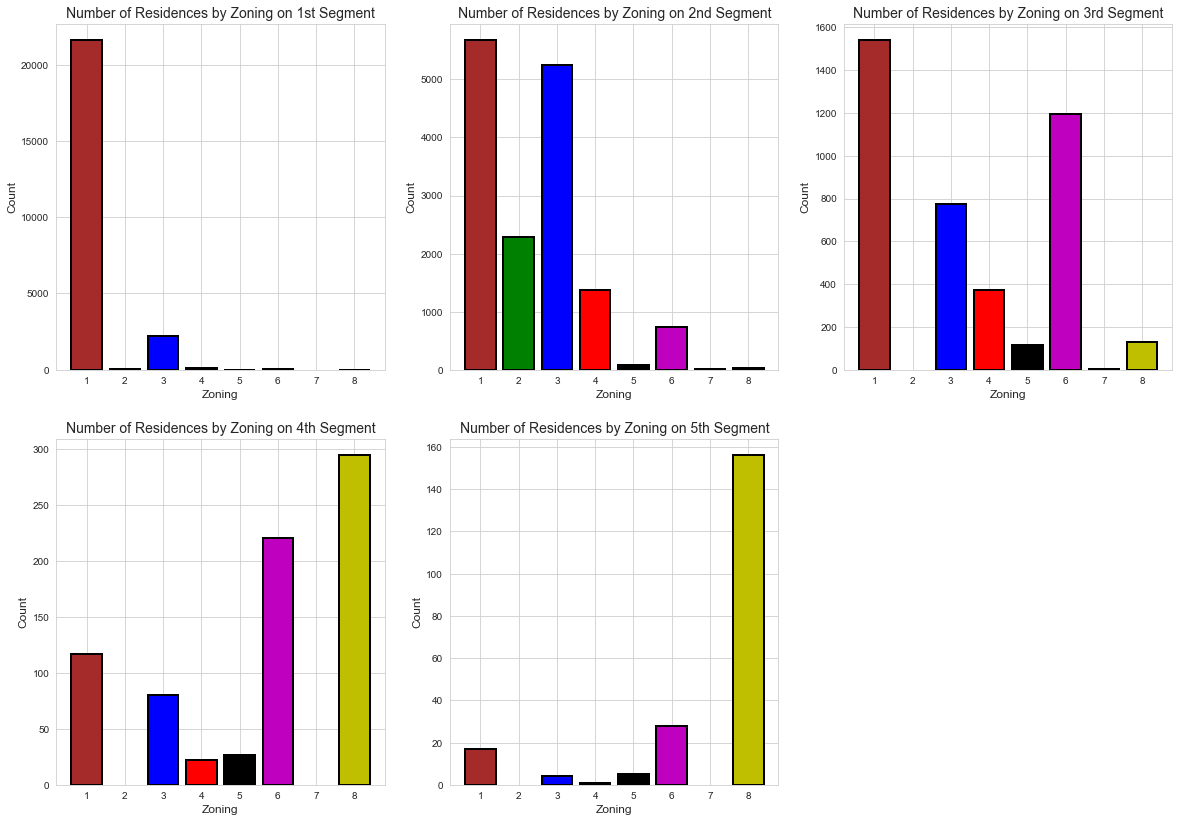

In [36]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['zoning', 'segment']].groupby('zoning').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['zoning'], seg1['count'], color = ['brown','g','b','r','k','m','y'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Zoning', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Zoning on 1st Segment', size=14)
ax1.set_xticks([1,2,3,4,5,6,7,8])

ax2.bar(seg2['zoning'], seg2['count'], color = ['brown','g','b','r','k','m','c','y'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Zoning', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Zoning on 2nd Segment', size=14)
ax2.set_xticks([1,2,3,4,5,6,7,8])

ax3.bar(seg3['zoning'], seg3['count'], color = ['brown', 'b','r','k','m','c','y'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Zoning', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Zoning on 3rd Segment', size=14)
ax3.set_xticks([1,2,3,4,5,6,7,8])

ax4.bar(seg4['zoning'], seg4['count'], color = ['brown','b','r','k','m','y'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Zoning', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Zoning on 4th Segment', size=14)
ax4.set_xticks([1,2,3,4,5,6,7,8])

ax5.bar(seg5['zoning'], seg5['count'], color = ['brown','b','r','k','m','y'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Zoning', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Zoning on 5th Segment', size=14)
ax5.set_xticks([1,2,3,4,5,6,7,8])

plt.show()

'RSA' dominates zoning type at in the first to third segment with 'RSA-5' being the majority
whereas 'RSD' dominates at fourth and fifth segment with 'RSD-1' being the majority.

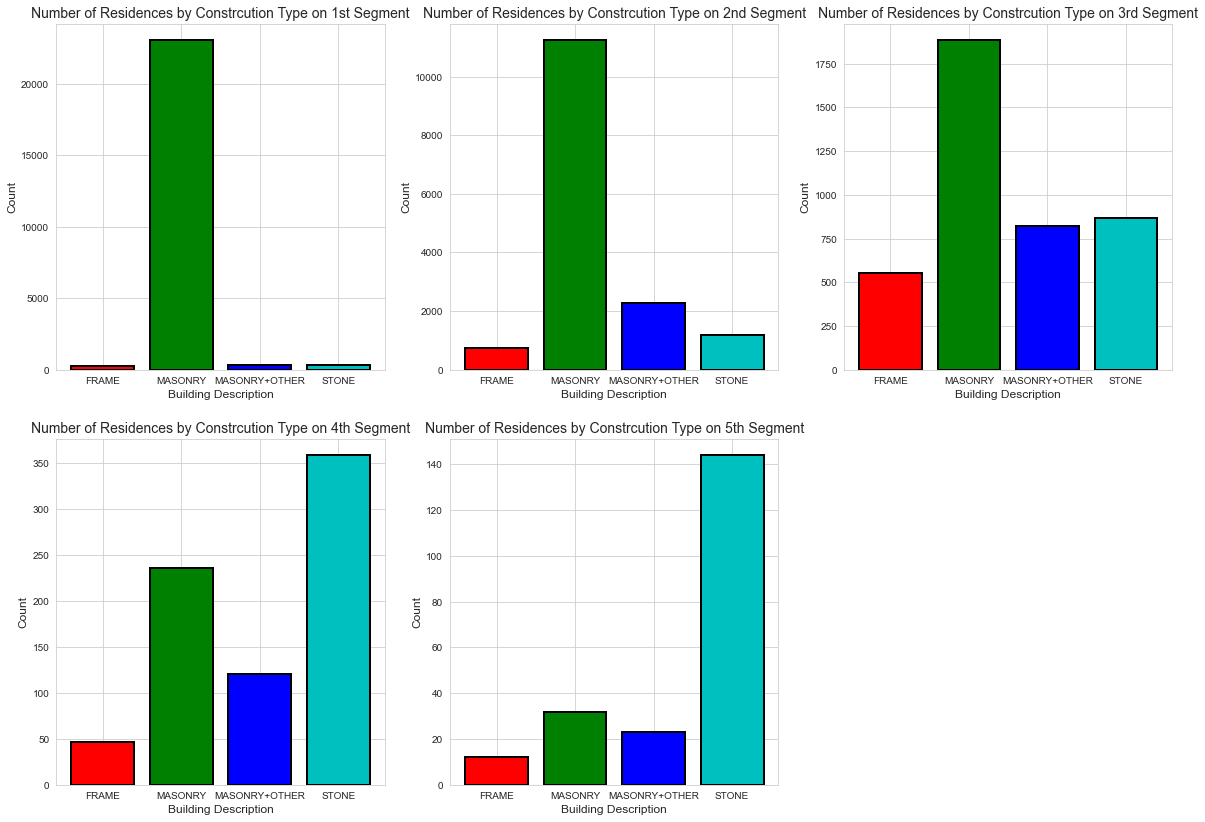

In [37]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['building_description', 'segment']].groupby('building_description').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['building_description'], seg1['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Building Description', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Constrcution Type on 1st Segment', size=14)
ax1.set_xticks(['FRAME','MASONRY','MASONRY+OTHER','STONE'])

ax2.bar(seg2['building_description'], seg2['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Building Description', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Constrcution Type on 2nd Segment', size=14)
ax2.set_xticks(['FRAME','MASONRY','MASONRY+OTHER','STONE'])

ax3.bar(seg3['building_description'], seg3['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Building Description', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Constrcution Type on 3rd Segment', size=14)
ax3.set_xticks(['FRAME','MASONRY','MASONRY+OTHER','STONE'])

ax4.bar(seg4['building_description'], seg4['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Building Description', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Constrcution Type on 4th Segment', size=14)
ax4.set_xticks(['FRAME','MASONRY','MASONRY+OTHER','STONE'])

ax5.bar(seg5['building_description'], seg5['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Building Description', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Constrcution Type on 5th Segment', size=14)
ax5.set_xticks(['FRAME','MASONRY','MASONRY+OTHER','STONE'])

plt.show()

'MASONRY' dominates the construction type in the first to third segment whereas 'STONE' dominates at fourth and fifth segment.


In [38]:
# Binning column basements for analysis basements
df['basements_bin'] = df['basements'].replace({'0' : 'None', 'A' :'Full-Size', 'B' : 'Full-Size', 'C' : 'Full-Size', 'D' :'Full-Size', 'E' : 'Partial-Size', 'F' :'Partial-Size', 'G' :'Partial-Size', 'H' : 'Partial-Size', 'I' : 'Unknown-Size', 'J' :'Unknown-Size'})

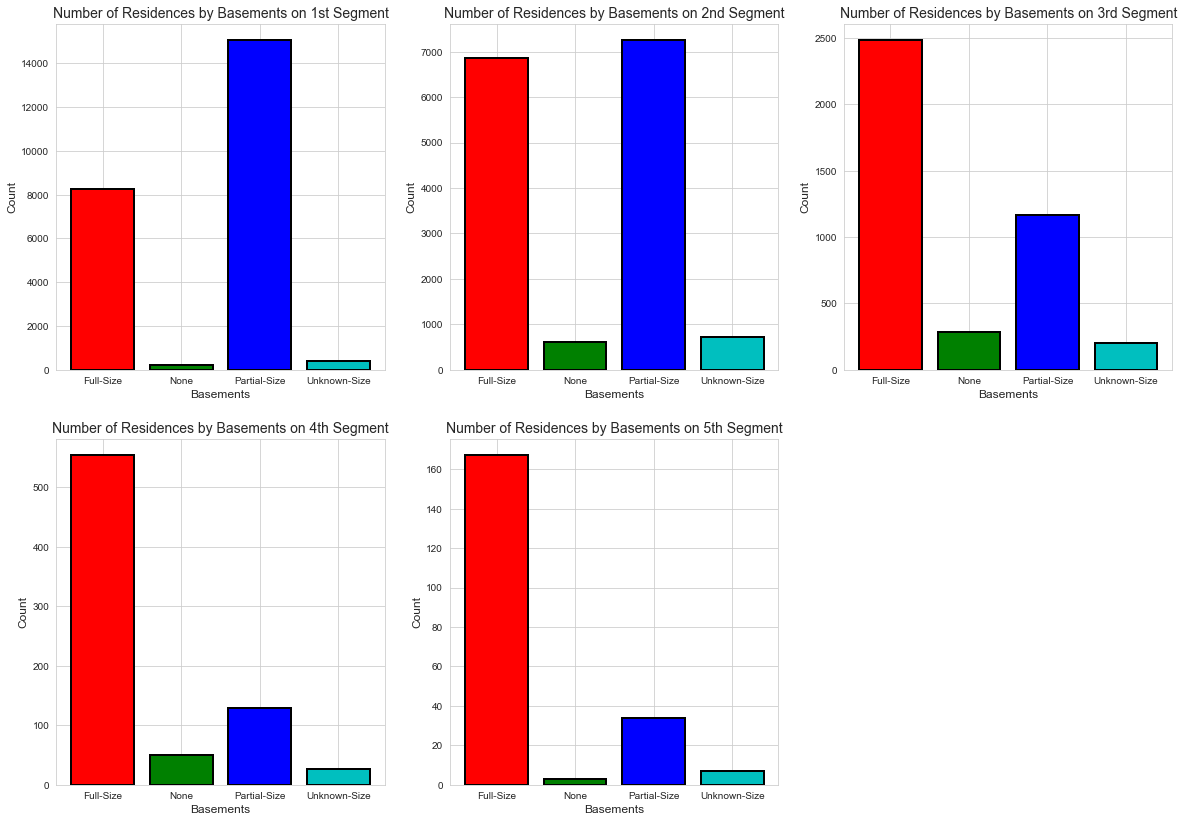

In [39]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['basements_bin', 'segment']].groupby('basements_bin').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['basements_bin'], seg1['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Basements', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Basements on 1st Segment', size=14)
ax1.set_xticks(['None','Full-Size','Partial-Size','Unknown-Size'])

ax2.bar(seg2['basements_bin'], seg2['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Basements', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Basements on 2nd Segment', size=14)
ax2.set_xticks(['None','Full-Size','Partial-Size','Unknown-Size'])

ax3.bar(seg3['basements_bin'], seg3['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Basements', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Basements on 3rd Segment', size=14)
ax3.set_xticks(['None','Full-Size','Partial-Size','Unknown-Size'])

ax4.bar(seg4['basements_bin'], seg4['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Basements', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Basements on 4th Segment', size=14)
ax4.set_xticks(['None','Full-Size','Partial-Size','Unknown-Size'])

ax5.bar(seg5['basements_bin'], seg5['count'], color = ['r','g','b','c'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Basements', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Basements on 5th Segment', size=14)
ax5.set_xticks(['None','Full-Size','Partial-Size','Unknown-Size'])

plt.show()

'Partial-Size' basements dominates at the first to third segment with 'Full-Size' basements seeing a sharp increase at the third segment until it totally dominates at the fourth and fifth segment.

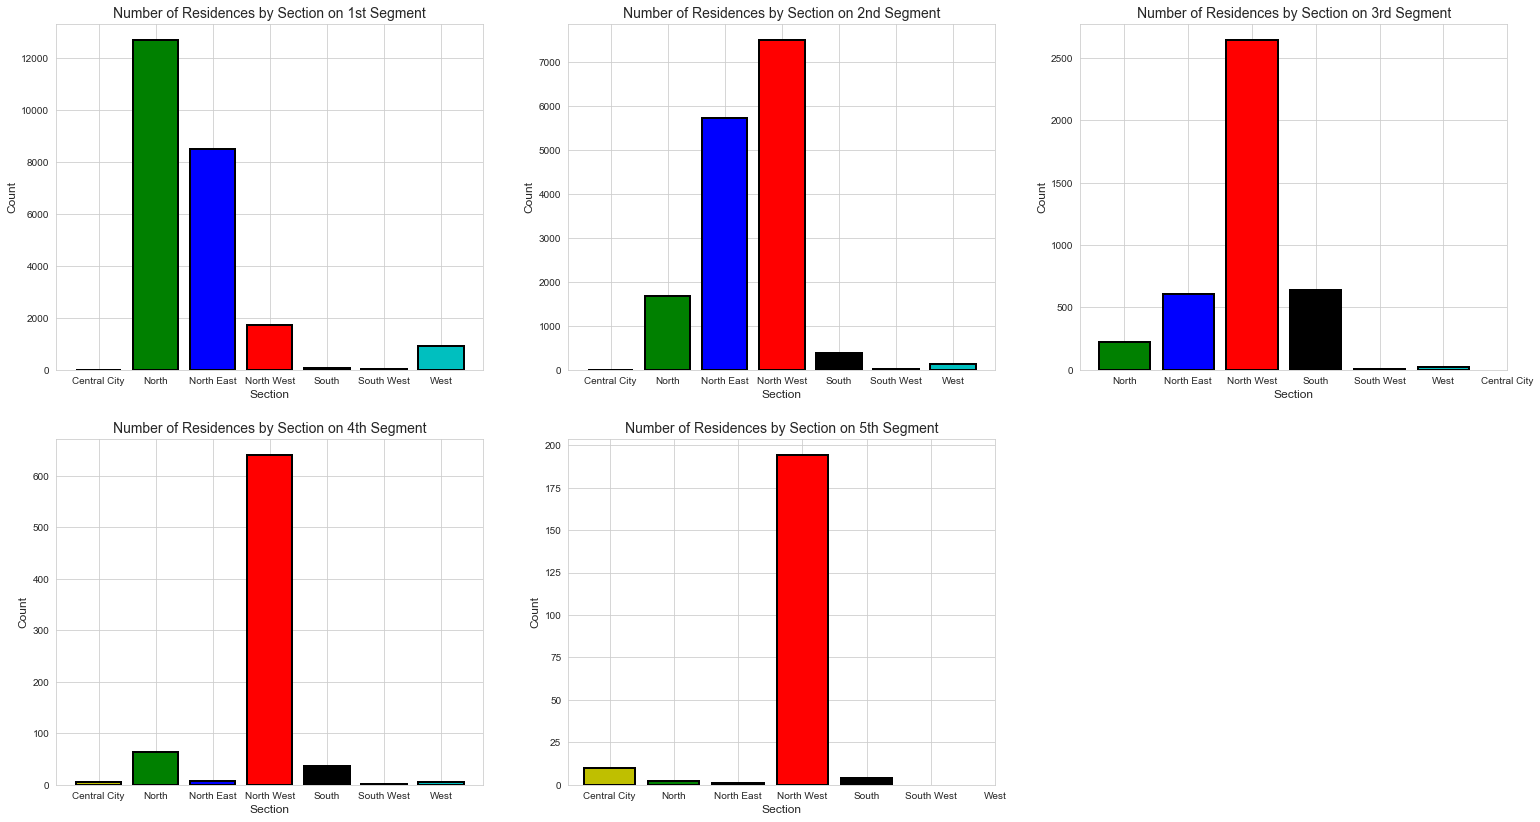

In [40]:
def ext(segment):
    seg = df[df['segment'] == segment]
    kol = seg[['section', 'segment']].groupby('section').count().reset_index()
    kol['count'] = kol['segment']
    return kol
seg1 = ext(1)
seg2 = ext(2)
seg3 = ext(3)
seg4 = ext(4)
seg5 = ext(5)

fig = plt.figure(figsize=(26,14))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.bar(seg1['section'], seg1['count'], color = ['y','g','b','r','k','m','c'], edgecolor='k', linewidth=2)
ax1.set_xlabel('Section', size=12)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Number of Residences by Section on 1st Segment', size=14)
ax1.set_xticks(['Central City', 'North', 'North East', 'North West', 'South', 'South West', 'West'])

ax2.bar(seg2['section'], seg2['count'], color = ['y','g','b','r','k','m','c'], edgecolor='k', linewidth=2)
ax2.set_xlabel('Section', size=12)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Number of Residences by Section on 2nd Segment', size=14)
ax2.set_xticks(['Central City', 'North', 'North East', 'North West', 'South', 'South West', 'West'])

ax3.bar(seg3['section'], seg3['count'], color = ['g','b','r','k','m','c'], edgecolor='k', linewidth=2)
ax3.set_xlabel('Section', size=12)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Number of Residences by Section on 3rd Segment', size=14)
ax3.set_xticks(['Central City', 'North', 'North East', 'North West', 'South', 'South West', 'West'])

ax4.bar(seg4['section'], seg4['count'], color = ['y','g','b','r','k','m','c'], edgecolor='k', linewidth=2)
ax4.set_xlabel('Section', size=12)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Number of Residences by Section on 4th Segment', size=14)
ax4.set_xticks(['Central City', 'North', 'North East', 'North West', 'South', 'South West', 'West'])

ax5.bar(seg5['section'], seg5['count'], color = ['y','g','b','r','k'], edgecolor='k', linewidth=2)
ax5.set_xlabel('Section', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('Number of Residences by Section on 5th Segment', size=14)
ax5.set_xticks(['Central City', 'North', 'North East', 'North West', 'South', 'South West', 'West'])

plt.show()

Most segment located in the North with 'North' and 'Northeast' dominated by cheaper building. Almost all segment is located in 'Northwest' except the first segment.

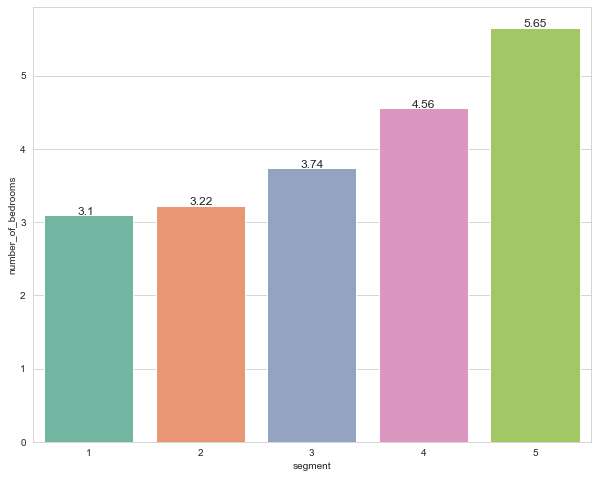

In [41]:
bedrooms = df[['number_of_bedrooms', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(bedrooms['segment'], bedrooms['number_of_bedrooms'], palette = 'Set2')

for index, value in enumerate(bedrooms['number_of_bedrooms']):
    plt.text(index-0.1, value+0.01, round(value,2), size=12)

plt.show()

Higher segment also means higher numbers of bedrooms.


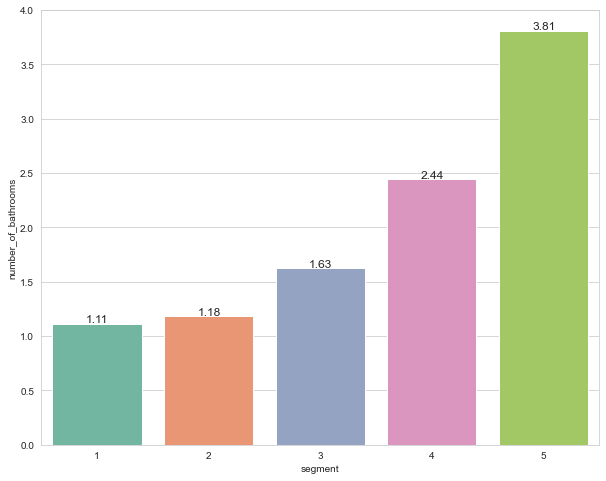

In [42]:
bathrooms = df[['number_of_bathrooms', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(bathrooms['segment'], bathrooms['number_of_bathrooms'], palette = 'Set2')

for index, value in enumerate(bathrooms['number_of_bathrooms']):
    plt.text(index-0.1, value+0.01, round(value,2), size=12)

plt.show()

Higher segment also means higher numbers of bathrooms.


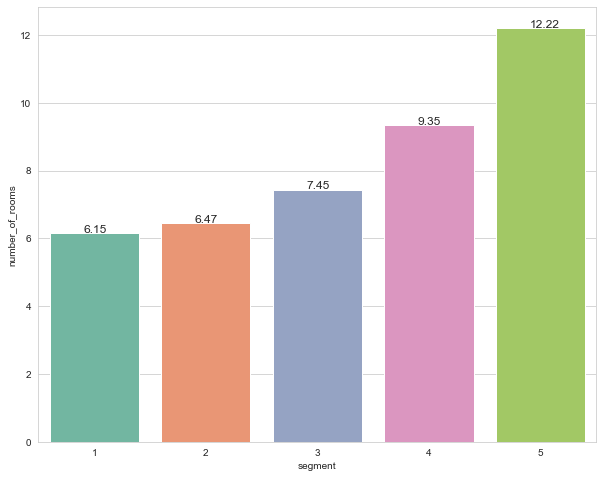

In [43]:
rooms = df[['number_of_rooms', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(rooms['segment'], rooms['number_of_rooms'], palette = 'Set2')

for index, value in enumerate(rooms['number_of_rooms']):
    plt.text(index-0.1, value+0.01, round(value,2), size=12)
    
plt.show()

Higher segment also means higher numbers of rooms.


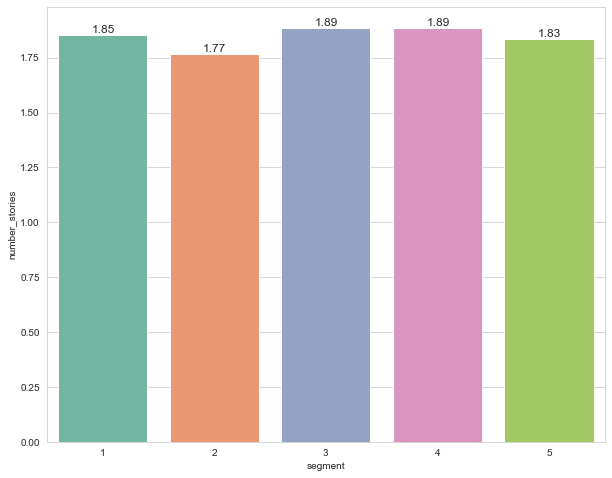

In [44]:
stories = df[['number_stories', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(stories['segment'], stories['number_stories'], palette = 'Set2')

for index, value in enumerate(stories['number_stories']):
    plt.text(index-0.1, value+0.01, round(value,2), size=12)

plt.show()

Higher segment doesn't seem to indicate higher number of stories (having more or less the same numbers).


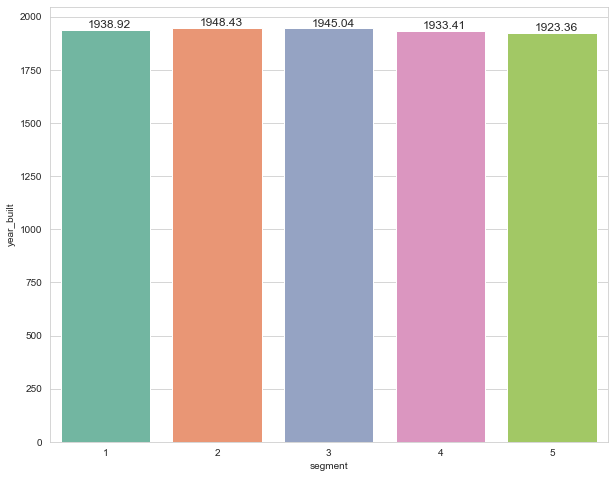

In [45]:
year = df[['year_built', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(year['segment'], year['year_built'], palette = 'Set2')

for index, value in enumerate(year['year_built']):
    plt.text(index-0.155, value+10, round(value,2), size=12)

plt.show()

The average of the year-built in this dataset is between 1923 to 1948.

### ==============================================================

# Assumption

In [46]:
avgcapital1 = df[df['segment'] == 1]['market_value'].describe().loc['25%']
avgsell1 = df[df['segment'] == 1]['market_value'].mean()
margin1 = round(((avgsell1 / avgcapital1)-1) * 100,2)
print("Margin Profit Segment 1 : ", margin1, "%")

Margin Profit Segment 1 :  10.76 %


In [47]:
avgcapital2 = df[df['segment'] == 2]['market_value'].describe().loc['25%']
avgsell2 = df[df['segment'] == 2]['market_value'].mean()
margin2 = round(((avgsell2 / avgcapital2)-1) * 100,2)
print("Margin Profit Segment 2 : ", margin2, "%")

Margin Profit Segment 2 :  11.44 %


In [48]:
avgcapital3 = df[df['segment'] == 3]['market_value'].describe().loc['25%']
avgsell3 = df[df['segment'] == 3]['market_value'].mean()
margin3 = round(((avgsell3 / avgcapital3)-1) * 100,2)
print("Margin Profit Segment 3 : ", margin3, "%")

Margin Profit Segment 3 :  16.31 %


In [49]:
avgcapital4 = df[df['segment'] == 4]['market_value'].describe().loc['25%']
avgsell4 = df[df['segment'] == 4]['market_value'].mean()
margin4 = round(((avgsell4 / avgcapital4)-1) * 100,2)
print("Margin Profit Segment 4 : ", margin4, "%")

Margin Profit Segment 4 :  19.34 %


In [50]:
avgcapital5 = df[df['segment'] == 5]['market_value'].describe().loc['25%']
avgsell5 = df[df['segment'] == 5]['market_value'].mean()
margin5 = round(((avgsell5 / avgcapital5)-1) * 100,2)
print("Margin Profit Segment 5 : ", margin5, "%")

Margin Profit Segment 5 :  20.67 %


In [51]:
df_assumption = pd.crosstab(index=df['segment'],columns='count').reset_index()
df_assumption

col_0,segment,count
0,1,23938
1,2,15443
2,3,4132
3,4,760
4,5,211


In [52]:
df_assumption['price ($)'] = [avgsell1, avgsell2, avgsell3, avgsell4, avgsell5]
df_assumption['margin_profit (%)'] = [margin1, margin2, margin3, margin4, margin5]
df_assumption['assumption_sales (unit)'] = [211,211,211,211,211]
df_assumption['profit ($)'] = '$' + (round((df_assumption['price ($)'] * df_assumption['assumption_sales (unit)'] * (df_assumption['margin_profit (%)']/100)).astype(float)/1000000 , 2)).astype('str') + 'M'

In [53]:
df_assumption

col_0,segment,count,price ($),margin_profit (%),assumption_sales (unit),profit ($)
0,1,23938,1.226065e+05,10.76,211,$2.78M
1,2,15443,2.189743e+05,11.44,211,$5.29M
2,3,4132,3.721775e+05,16.31,211,$12.81M
3,4,760,7.146043e+05,19.34,211,$29.16M
4,5,211,1.331672e+06,20.67,211,$58.08M


Based on the table above, if the sales performances are the same across the board (sold 211 units), then it will be better to focus on the segment 5 because the total numbers of property in this segment is 211. If we focus on others segment, then it will take longer time and higher total spending for marketing and sale needs. Even though segment 1 & 2 has more properties and in the long run will give higher profit than segment 5, but if we focus on the segment 1 and 2 then total spending for sales salary will be higher.

### ==============================================================

# Conclusion
- Higher segment also means higher for market value, total livable area, total area, total numbers of rooms.
- The average of the year-built in this dataset is between 1923 to 1948.
- Higher segment doesn't seem to indicate higher number of stories (having more or less the same numbers).
- 'Partial-Size' basements dominates at the first to third segment with 'Full-Size' basements seeing a sharp increase at the third segment until it totally dominates at the fourth and fifth segment.
- 'MASONRY' dominates the construction type in the first to third segment whereas 'STONE' dominates at fourth and fifth segment.
- 'RSA' dominates zoning type at in the first to third segment with 'RSA-5' being the majority whereas 'RSD' dominates at fourth and fifth segment with 'RSD-1' being the majority.
- 'Rectangle' dominates the parcel shape at the first to third segment, with an increase in 'irregular' and 'grossly irregular' at fourth and fifth segment.
- 'Level' dominate the topography type in the first to third segment, whereas we can see more houses 'below street level' at fourth and fifth segment.
- 'Built in/basement' dominates the garage type in the first to third segment, whereas the fourth and fifth segment prefer 'detached' garage.
- 'Hot air ducts', 'hot water' and 'undetermined' dominate the heater type with exception in the fifth segment where 'heat pump' and 'radiant' started to take over.
- In the higher the segment, we can see an increase of houses with fireplaces.
- 'Typical' dominate the view type for the first to fourth segment, but at the same time 'park/green area' also seeing an increase in the higher segment with the fifth segment having 'park/green area' dominate fully.
- 'Average' condition for interior condition dominate the first to fourth segment, but at the same time 'above average' also seeing an increase in the higher segment with the fifth segment having 'above average' dominate fully.
- 'Average' condition for exterior condition dominate the first to fourth segment, but at the same time 'above average' also seeing an increase in the higher segment with the fifth segment having 'above average' dominate fully.
- Group from the first segment answered mostly no for central air, but at the same time, higher segment mostly answered yes even though some of them also answered no.
- Most segment located in the North with 'North' and 'Northeast' dominated by cheaper building. Almost all segment is located in 'Northwest' except the first segment.

# Recommendation
- Even with the same performance from the sales across the segment, the fifth segment managed to get higher profit-margin up to 20,67% and so it is recommended to prioritize this segment as they can give us higher profit and at the same time creates efficiency in sales department.
- It will be more effective if we know exactly which type of house is more suitable for which customers segment so the company able to maximize their marketing strategies. For example, customers from lower Middle Cluster is not a suitable target if we try to sell them properties from Top Cluster and vice-versa as it will be most inefficient.
- We can try to give some promotions such as 0% dp. This will help our marketing side in selling houses to middle-low segment customers so that they become more interested in buying from us and at the same time emptied our stock of houses.

# --------------------------------------------------------------------------

### Now the Data is Ready for Machine Learning, we move to 6 - ML Classification.ipynb !

In [54]:
df.to_csv('PHL_Building_Dataset_ML_Classification.csv')